# Importing modules and libraries

In [1]:
from __future__ import print_function, division  # for compatibility with python 3.x
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings


import datetime
import time

# Import libraries use for visualization and analysis
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#import cufflinks as cf

# Import the Monasca and Keystone clients
from monascaclient import client
from monascaclient import ksclient

from pandas import Series,DataFrame
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

np.set_printoptions(suppress=True)
DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

# Import library to execute remote commands for monasca-agent demo
#import spur
import pylab as pl 
from itertools import cycle
# Not installed in windows
#import pymongo
#from pymongo import MongoClient

from password import *

In [13]:
%qtconsole

# Loading the Data 

In [2]:

df_Ellis  = DataFrame.from_csv("Data/Ellis.csv",sep=';')
df_Bono   = DataFrame.from_csv("Data/Bono.csv",sep=';')
df_Sprout = DataFrame.from_csv("Data/Sprout.csv",sep=';')
df_Homer  = DataFrame.from_csv("Data/Homer.csv",sep=';')
df_HS     = DataFrame.from_csv("Data/Homestead.csv",sep=';')
df_Ralf   = DataFrame.from_csv("Data/Ralf.csv",sep=';')

Here I will create new features :

    features powered 2 and 3 
    
    moving avreges 2 to 10 
    
    Here add new things ...
    
And then I will Scale and transform my features: 

    PCA
    
    Whitening 
    
    scalling 
    
    
Forecasting can also be recursive f(f(f(f(t))))

In [3]:
df_Ellis.head()

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb
Timestamp,,,,,,
2016-08-31 20:47:23.230,2.04,16.8,65.800000,3.6,5967.800000,4997
2016-08-31 20:47:53.252,1.82,12.7,65.266667,0.9,5722.100000,5014
2016-08-31 20:48:23.233,1.63,14.3,65.200000,0.6,5487.333333,5013
2016-08-31 20:48:53.256,1.63,17.5,65.233333,0.6,5545.433333,5014
2016-08-31 20:49:23.235,1.37,18.0,65.866667,0.5,5597.666667,5013


# Creating new features

In [72]:
# Adding Dummy variable
df_Ellis['V0'] = 1;
df_Bono['V0'] = 2
df_Sprout['V0'] = 3;
df_Homer['V0'] = 4;
df_HS['V0'] = 5;
df_Ralf['V0'] = 6;

In [73]:
# Merging all the DataFrame all together
df_ALL = df_Ellis.append(df_Bono, ignore_index=False)
df_ALL = df_ALL.append(df_Sprout, ignore_index=False)
df_ALL = df_ALL.append(df_Homer, ignore_index=False)
df_ALL = df_ALL.append(df_HS, ignore_index=False)
df_ALL = df_ALL.append(df_Ralf, ignore_index=False)

In [90]:
df_ALL

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,V0
Timestamp,,,,,,,
2016-08-31 20:47:23.230,2.04,16.8,65.800000,3.6,5967.800000,4997,1
2016-08-31 20:47:53.252,1.82,12.7,65.266667,0.9,5722.100000,5014,1
2016-08-31 20:48:23.233,1.63,14.3,65.200000,0.6,5487.333333,5013,1
2016-08-31 20:48:53.256,1.63,17.5,65.233333,0.6,5545.433333,5014,1
2016-08-31 20:49:23.235,1.37,18.0,65.866667,0.5,5597.666667,5013,1
2016-08-31 20:49:53.248,1.62,17.9,64.400000,0.6,5576.833333,5013,1
2016-08-31 20:50:23.237,1.49,17.4,66.800000,0.5,5595.966667,5013,1
2016-08-31 20:50:53.255,1.17,17.8,62.866667,0.5,5437.466667,5013,1
2016-08-31 20:51:23.239,1.57,14.6,64.300000,0.5,5498.233333,5014,1


# Finding dependencies within the features

In [45]:
df_ALL.loc[:, "load_avg_1_min":"mem_free_mb"]

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb
0,2.04,16.8,65.800000,3.6,5967.800000,4997
1,1.82,12.7,65.266667,0.9,5722.100000,5014
2,1.63,14.3,65.200000,0.6,5487.333333,5013
3,1.63,17.5,65.233333,0.6,5545.433333,5014
4,1.37,18.0,65.866667,0.5,5597.666667,5013
5,1.62,17.9,64.400000,0.6,5576.833333,5013
6,1.49,17.4,66.800000,0.5,5595.966667,5013
7,1.17,17.8,62.866667,0.5,5437.466667,5013
8,1.57,14.6,64.300000,0.5,5498.233333,5014
9,1.24,11.4,64.133333,0.5,5553.533333,5014


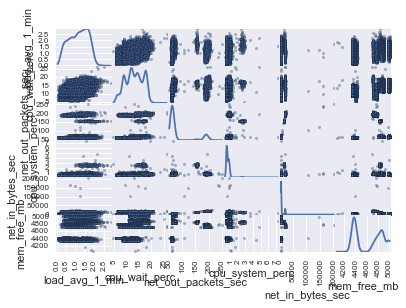

In [57]:
pd.tools.plotting.scatter_matrix(df_Ellis.loc[:, "load_avg_1_min":"mem_free_mb"], diagonal="kde")
#plt.tight_layout()
plt.figure(figsize=(300,250))
plt.show()

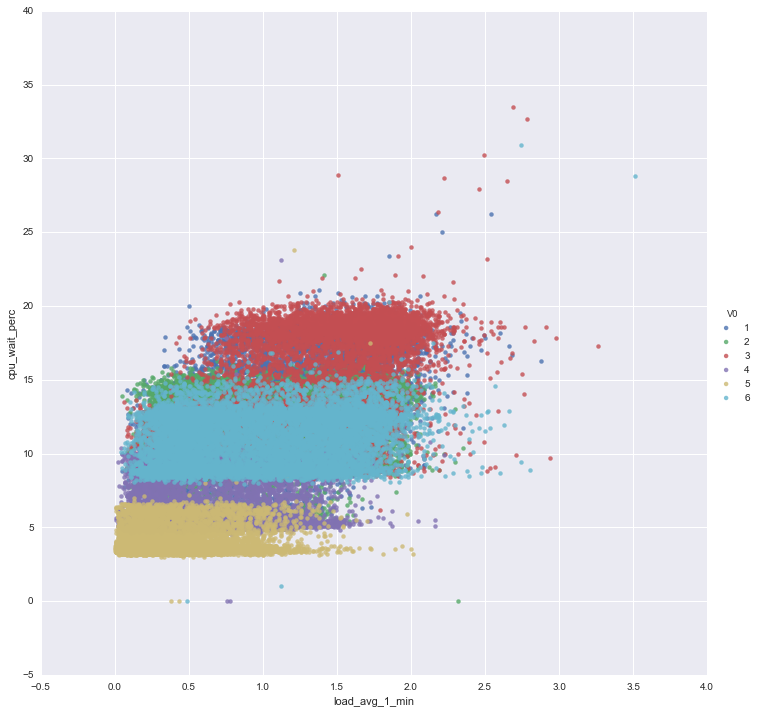

In [61]:

sns.lmplot("load_avg_1_min", "cpu_wait_perc", df_ALL, hue="V0", fit_reg=False,size=10);

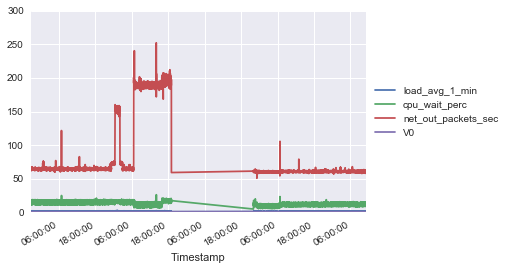

In [108]:
plt.figure(figsize=(15, 6))
ax = df_Ellis[["load_avg_1_min","cpu_wait_perc","net_out_packets_sec","V0"]].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [75]:
df_ALL.to_csv("Data/All_data.csv",header=True,sep=",")

In [81]:

df_Ellis.corrwith(df_Ellis['load_avg_1_min'])

load_avg_1_min         1.000000
cpu_wait_perc          0.478685
net_out_packets_sec    0.068548
cpu_system_perc        0.230994
net_in_bytes_sec       0.046391
mem_free_mb            0.359434
V0                          NaN
dtype: float64

In [77]:
df_Ellis.corr(method='spearman', min_periods=3)

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,V0
load_avg_1_min,1.000000,0.471284,0.289833,0.203486,0.272518,0.301121,NaN
cpu_wait_perc,0.471284,1.000000,0.490246,0.262355,0.462328,0.523594,NaN
net_out_packets_sec,0.289833,0.490246,1.000000,0.546415,0.962085,0.596290,NaN
cpu_system_perc,0.203486,0.262355,0.546415,1.000000,0.528049,0.369053,NaN
net_in_bytes_sec,0.272518,0.462328,0.962085,0.528049,1.000000,0.502103,NaN
mem_free_mb,0.301121,0.523594,0.596290,0.369053,0.502103,1.000000,NaN
V0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
X=df_ALL
df_ALL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60000 entries, 2016-08-31 20:47:23.230000 to 2016-09-07 11:02:18.592000
Data columns (total 7 columns):
load_avg_1_min         60000 non-null float64
cpu_wait_perc          60000 non-null float64
net_out_packets_sec    60000 non-null float64
cpu_system_perc        60000 non-null float64
net_in_bytes_sec       60000 non-null float64
mem_free_mb            60000 non-null float64
V0                     60000 non-null int64
dtypes: float64(6), int64(1)
memory usage: 3.7 MB


In [86]:
X.apply(np.mean)

load_avg_1_min            0.911920
cpu_wait_perc            10.049730
net_out_packets_sec      86.292770
cpu_system_perc           0.843620
net_in_bytes_sec       8266.162109
mem_free_mb            3584.210617
V0                        3.500000
dtype: float64

In [87]:
X.apply(np.std)

load_avg_1_min            0.549837
cpu_wait_perc             4.523562
net_out_packets_sec      48.596772
cpu_system_perc           0.267379
net_in_bytes_sec       6035.662164
mem_free_mb            1332.331403
V0                        1.707825
dtype: float64

In [99]:
Ellis = df_ALL[df_ALL.V0 == 1]

In [101]:
Ellis.loc[:, "load_avg_1_min":].apply(np.mean)

load_avg_1_min            1.156925
cpu_wait_perc            13.285880
net_out_packets_sec      83.713010
cpu_system_perc           0.698570
net_in_bytes_sec       8050.983438
mem_free_mb            4648.403200
V0                        1.000000
dtype: float64

In [102]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [103]:
y = df_ALL.V0
printMeanAndSdByGroup(X, y)


## Means:


,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,V0
V0,,,,,,,
1,1.156925,13.28588,83.713010,0.69857,8050.983438,4648.4032,1
2,1.011390,11.23235,72.039585,0.86385,6692.247174,4429.9301,2
3,1.283178,14.49246,66.626445,0.98047,5831.235924,4469.0999,3
4,0.600320,6.28607,173.436744,0.85525,18221.564413,1591.2538,4
5,0.412634,3.92801,60.590860,0.70861,5395.303853,1842.8354,5
6,1.007072,11.07361,61.349977,0.95497,5405.637854,4523.7413,6



## Standard deviations:


,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,V0
V0,,,,,,,
1,0.497204,3.438494,47.027520,0.326008,6556.089854,252.770594,0
2,0.497629,2.407410,33.468251,0.211783,4260.422223,36.318199,0
3,0.518555,3.791719,13.070497,0.323406,3269.458723,139.943176,0
4,0.383947,1.642918,34.498839,0.207419,4269.181444,194.695412,0
5,0.289604,0.894382,1.369207,0.182162,1676.183293,77.919808,0
6,0.505675,1.727012,1.381120,0.161491,1315.331553,64.102725,0



## Sample sizes:


,0
V0,
1,10000
2,10000
3,10000
4,10000
5,10000
6,10000


In [104]:
corrmat = X.corr()
corrmat

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,V0
load_avg_1_min,1.000000,0.624572,-0.159829,0.139416,-0.153784,0.517931,-0.286502
cpu_wait_perc,0.624572,1.000000,-0.240846,0.151375,-0.232277,0.767072,-0.444211
net_out_packets_sec,-0.159829,-0.240846,1.000000,0.105722,0.938039,-0.476238,-0.039512
cpu_system_perc,0.139416,0.151375,0.105722,1.000000,0.094014,0.153957,0.126114
net_in_bytes_sec,-0.153784,-0.232277,0.938039,0.094014,1.000000,-0.441543,-0.038217
mem_free_mb,0.517931,0.767072,-0.476238,0.153957,-0.441543,1.000000,-0.412473
V0,-0.286502,-0.444211,-0.039512,0.126114,-0.038217,-0.412473,1.000000


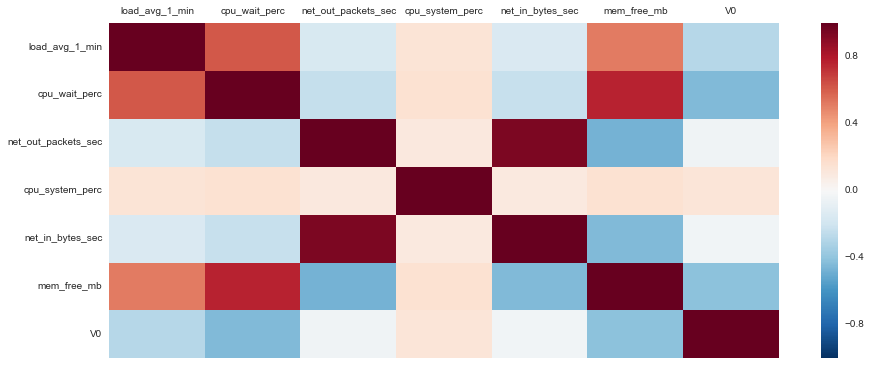

In [107]:
plt.figure(figsize=(15, 6))
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

In [109]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [114]:
#df_ALL.loc[:, "load_avg_1_min":"mem_free_mb"]
mosthighlycorrelated(X.loc[:,"load_avg_1_min":"mem_free_mb"], 10)

,FirstVariable,SecondVariable,Correlation
0,net_out_packets_sec,net_in_bytes_sec,0.938039
1,cpu_wait_perc,mem_free_mb,0.767072
2,load_avg_1_min,cpu_wait_perc,0.624572
3,load_avg_1_min,mem_free_mb,0.517931
4,net_out_packets_sec,mem_free_mb,-0.476238
5,net_in_bytes_sec,mem_free_mb,-0.441543
6,cpu_wait_perc,net_out_packets_sec,-0.240846
7,cpu_wait_perc,net_in_bytes_sec,-0.232277
8,load_avg_1_min,net_out_packets_sec,-0.159829
9,cpu_system_perc,mem_free_mb,0.153957


In [125]:
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
standardisedX;

In [126]:
standardisedX.apply(np.mean)

load_avg_1_min        -7.751725e-16
cpu_wait_perc          9.740373e-15
net_out_packets_sec   -6.493593e-16
cpu_system_perc        4.661807e-14
net_in_bytes_sec      -1.666975e-15
mem_free_mb           -1.668808e-14
V0                    -4.176659e-17
dtype: float64

In [127]:
standardisedX

,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,V0
Timestamp,,,,,,,
2016-08-31 20:47:23.230,2.051661,1.492246,-0.421690,10.308904,-0.380797,1.060389,-1.46385
2016-08-31 20:47:53.252,1.651543,0.585881,-0.432665,0.210862,-0.421505,1.073148,-1.46385
2016-08-31 20:48:23.233,1.305986,0.939585,-0.434036,-0.911143,-0.460402,1.072398,-1.46385
2016-08-31 20:48:53.256,1.305986,1.646992,-0.433351,-0.911143,-0.450776,1.073148,-1.46385
2016-08-31 20:49:23.235,0.833119,1.757524,-0.420318,-1.285144,-0.442121,1.072398,-1.46385
2016-08-31 20:49:53.248,1.287799,1.735418,-0.450498,-0.911143,-0.445573,1.072398,-1.46385
2016-08-31 20:50:23.237,1.051365,1.624885,-0.401112,-1.285144,-0.442403,1.072398,-1.46385
2016-08-31 20:50:53.255,0.469375,1.713311,-0.482051,-1.285144,-0.468664,1.072398,-1.46385
2016-08-31 20:51:23.239,1.196863,1.005904,-0.452556,-1.285144,-0.458596,1.073148,-1.46385


In [128]:
standardisedX.apply(np.std)

load_avg_1_min         1
cpu_wait_perc          1
net_out_packets_sec    1
cpu_system_perc        1
net_in_bytes_sec       1
mem_free_mb            1
V0                     1
dtype: float64

In [132]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [133]:
summary = pca_summary(pca, standardisedX)
summary

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.725645,0.425407,0.425407
PC2,1.306952,0.244017,0.669425
PC3,1.049037,0.157211,0.826636
PC4,0.773208,0.085407,0.912043
PC5,0.606810,0.052603,0.964646
PC6,0.433620,0.026861,0.991507
PC7,0.243830,0.008493,1.000000


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,1.725645,0.425407,0.425407
PC2,1.306952,0.244017,0.669425
PC3,1.049037,0.157211,0.826636
PC4,0.773208,0.085407,0.912043
PC5,0.606810,0.052603,0.964646
PC6,0.433620,0.026861,0.991507
PC7,0.243830,0.008493,1.000000


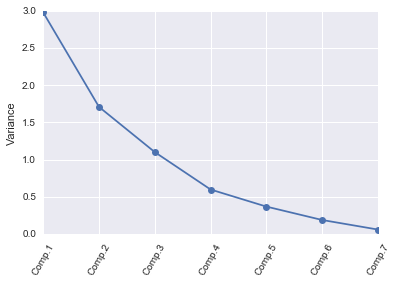

# Principal Component Analysis

In [129]:
pca = PCA().fit(standardisedX)

In [131]:
PCA?

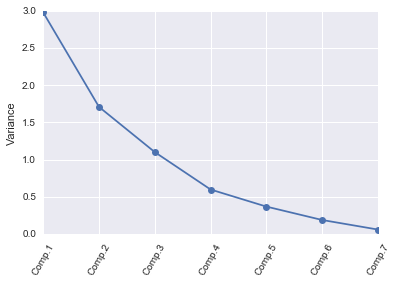

In [135]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedX)

### Deciding How Many Principal Components to Retain



The most obvious change in slope in the scree plot occurs at component 4, which is the "elbow" of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.
Another way of deciding how many components to retain is to use Kaiser’s criterion: that we should only retain principal components for which the variance is above 1 (when principal component analysis was applied to standardised data). We can check this by finding the variance of each of the principal components:

In [136]:
summary.sdev**2


,Standard deviation
PC1,2.977850
PC2,1.708122
PC3,1.100478
PC4,0.597850
PC5,0.368219
PC6,0.188027
PC7,0.059453


A third way to decide how many principal components to retain is to decide to keep the number of components required to explain at least some minimum amount of the total variance. For example, if it is important to explain at least 80% of the variance, we would retain the first five principal components, as we can see from cumulative proportions (summary.cumprop) that the first five principal components explain 80.2% of the variance (while the first four components explain just 73.6%, so are not sufficient).

In [137]:
pca.components_

array([[-0.38620547, -0.47474185,  0.3849702 , -0.04932588,  0.37691368,
        -0.5186117 ,  0.25260323],
       [ 0.29769228,  0.29901044,  0.54969735,  0.2314327 ,  0.55257675,
         0.10345753, -0.3875555 ],
       [ 0.09959007,  0.01989114, -0.0244498 ,  0.84166641, -0.03108271,
         0.04356795,  0.52708797],
       [-0.72166694, -0.06086219, -0.06949225,  0.39672252, -0.07583515,
         0.19603261, -0.5187436 ],
       [-0.46318738,  0.50387075,  0.14503861, -0.26827731,  0.20795244,
         0.40304555,  0.48256903],
       [-0.13023318,  0.65165108, -0.03336174,  0.07465683, -0.19891097,
        -0.71183954, -0.0736372 ],
       [ 0.00021714, -0.05077606,  0.72253346, -0.02585345, -0.68049108,
         0.10416449,  0.02793538]])

### Scatterplots of the Principal Components

The values of the principal components can be computed by the transform() (or fit_transform()) method of the PCA class. It returns a matrix with the principal components, where the first column in the matrix contains the first principal component, the second column the second component, and so on.
Thus, in our example, pca.transform(standardisedX)[:, 0] contains the first principal component, and pca.transform(standardisedX)[:, 1] contains the second principal component.
We can make a scatterplot of the first two principal components, and label the data points with the cultivar that the wine samples come from, by typing:

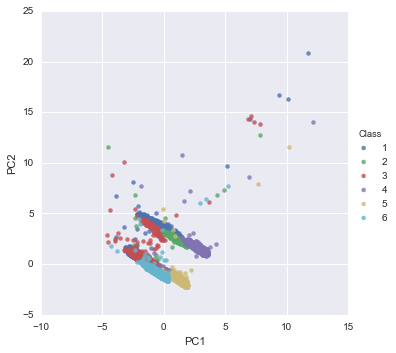

In [138]:

def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedX, y)

In [139]:
printMeanAndSdByGroup(standardisedX, y);

## Means:


,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,V0
V0,,,,,,,
1,0.445596,0.715399,-0.053085,-0.542489,-0.035651,0.798745,-1.46385
2,0.180908,0.261436,-0.293295,0.075661,-0.260769,0.634767,-0.87831
3,0.675214,0.982131,-0.404684,0.511821,-0.403423,0.664166,-0.29277
4,-0.566713,-0.832012,1.793205,0.043496,1.649430,-1.495842,0.29277
5,-0.908061,-1.353296,-0.528881,-0.504940,-0.475649,-1.307014,0.87831
6,0.173055,0.226344,-0.513260,0.416451,-0.473937,0.705178,1.46385



## Standard deviations:


,load_avg_1_min,cpu_wait_perc,net_out_packets_sec,cpu_system_perc,net_in_bytes_sec,mem_free_mb,V0
V0,,,,,,,
1,0.904274,0.760130,0.967709,1.219274,1.086225,0.189721,2.942091e-13
2,0.905047,0.532193,0.688693,0.792073,0.705875,0.027259,1.221245e-15
3,0.943106,0.838215,0.268958,1.209544,0.541690,0.105036,2.564615e-14
4,0.698292,0.363191,0.709900,0.775748,0.707326,0.146131,2.564615e-14
5,0.526708,0.197716,0.028175,0.681287,0.277713,0.058484,1.221245e-15
6,0.919681,0.381781,0.028420,0.603978,0.217927,0.048113,2.942091e-13



## Sample sizes:


,0
V0,
1,10000
2,10000
3,10000
4,10000
5,10000
6,10000


## Other way to use PCA

In [9]:
pca = PCA(n_components=2, whiten=True).fit(df_Ellis)
X_pca = pca.transform(df_Ellis)

In [11]:
print(pca.components_)

[[-0.00000353 -0.00002163 -0.00634432 -0.00001659 -0.99995241 -0.00741086]
 [ 0.00071586  0.00836404  0.01296876  0.00031821 -0.00749259  0.99985254]]


In [13]:
print(pca.explained_variance_)
print(sum(pca.explained_variance_ratio_))

[ 42986401.8073118      61550.19602304]
0.999988874998


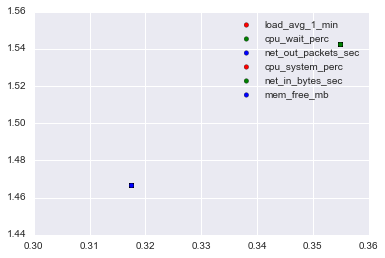

In [15]:
# https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/learn/v4/t/lecture/4020654
%matplotlib inline
from pylab import *

colors = cycle('rgb')
target_ids = range(len(df_Ellis.columns))
pl.figure()
for i, c, label in zip(target_ids, colors, df_Ellis.columns):
    pl.scatter(X_pca[df_Ellis.SLO == i, 0], X_pca[df_Ellis.SLO == i, 1],
        c=c, label=label)
pl.legend()
pl.show()

## ELT :  Extract - Load and Transform  